
<h1>Model to Predict House Prices </h1>



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.


I created a Model to predict house prices using train data. Data was analyzed and cleaned. After finding the correlation between different variables a model was created using linear regression. The model has accuracy of 88 percent for train data while 75.45 percent for test data. 

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

I started with uploading data and checked it's shape using data.shape function. I also used head and tail method to see first and last 5 rows. I used data. describe to find out min, max, mean etc. to get a little overview of different columns. I got my train data from oroginal data. I plotted different scatter plots with random variables to see which can possibly have a correlation.

I picked the columns that had numeric values. I looked for null values and dropped out those columns with null values. I found the correlation between house prices and diffrent columns and picked 15 columns with best correlation. I build  linear regression models with 3 different variable sets and tested all to see which produced best score for both train  and test data.




[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [115]:
# the data is related to huose prices and the factors that affects it. 
#Different facotrs such as number are rooms garage area etc are in columns. There are 100 rows and 82 columns. 
import matplotlib.pyplot as plt
import seaborn as sb # visualization
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
#y=X1B+X2B+X3D
info= pd.read_fwf("/Users/wardahiqbal/Downloads/data_description.txt", sep=" ") 
data= pd. read_csv("/Users/wardahiqbal/Downloads/houseSmallData.csv") # to read description about data 
data.shape


(100, 82)

<p> The data is related to huose prices and the factors that affects it. 
#Different facotrs such as number are rooms garage area etc are in columns. There are 100 rows and 82 columns.

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


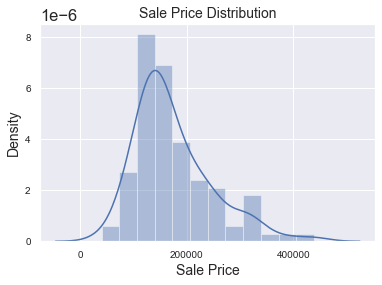

In [116]:
# different types of graph to show the relatinoship between variables 
#  we will use train data for this purpose
# pick out all the data as the train data 

train=data.iloc[0:100,]
train.shape
# histogram of house prices 
saleprice= train["SalePrice"]
saleprice.describe()
sb.distplot(train['SalePrice'],color = 'b')
plt.title('Sale Price Distribution', fontsize = 14)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('distplot.png')
plt.show()



<p> The first graph is sale price density graph which shows at what price range most houses are in the market. According to the graph most houses are between 100k to 300K.

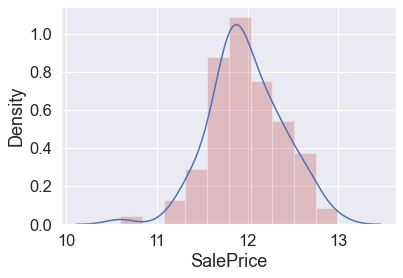

In [117]:
# histogram of log of density
plt.hist(np.log(saleprice), density=True, alpha=.3,color='r')
sns.kdeplot(data=np.log(saleprice))
plt.savefig('distplot.png')
plt.show()

<p>This Graph is basically the log of prices grpah which shows a normal distribution. 
    
    For the next Visulization below I plotted the scatter plots with different columns with int data type vs SalePrice. I created a DataDrame first to find their indexes so I can easily pick and choose from the list.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


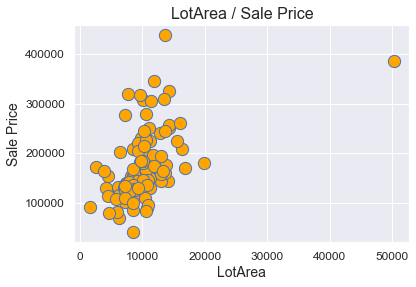

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


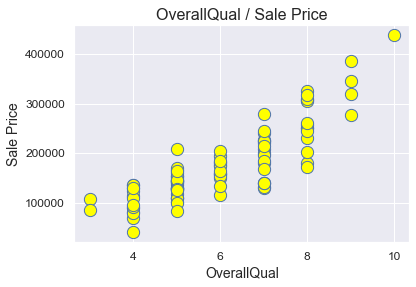

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


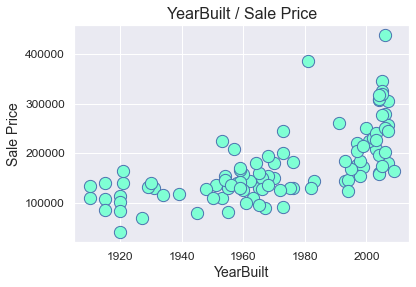

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


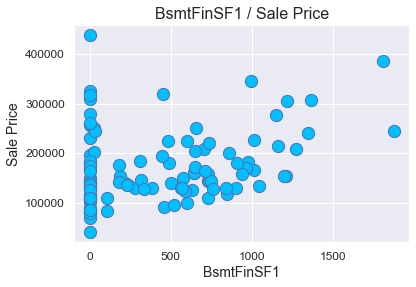

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


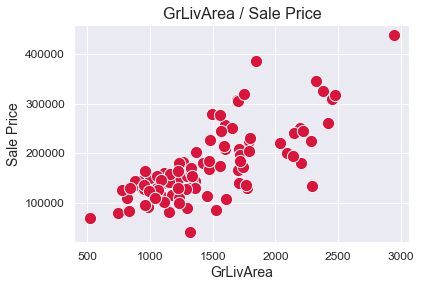

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


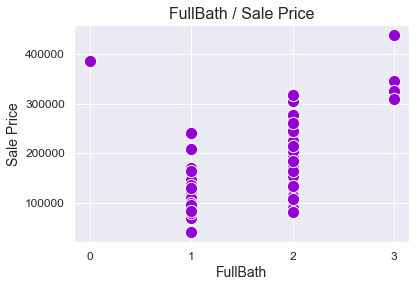

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


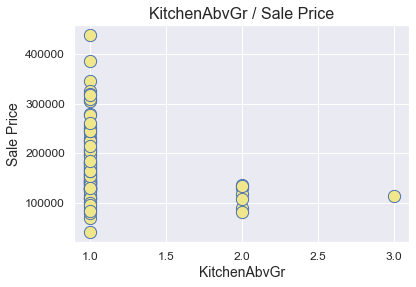

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


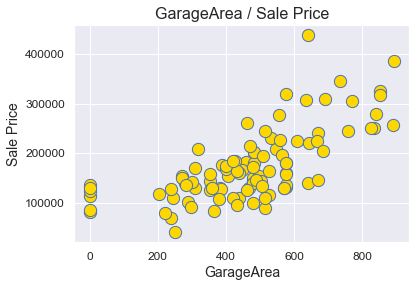

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


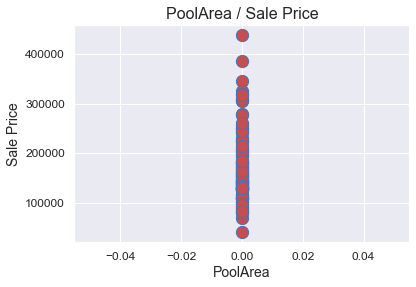

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


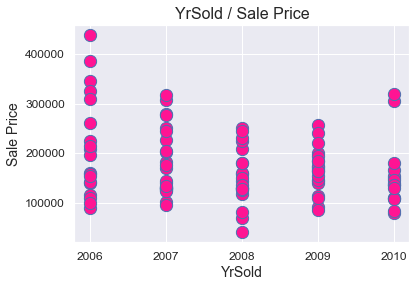

In [118]:
# I first seperated the columns with data type of int
# Refrwnce for the code is listed below
plt_col=list(data.select_dtypes(['int64']).columns)
df=pd.DataFrame(plt_col)
df

def scatter_df(y_var):
    scatter_df = train.drop(y_var, axis = 1)
    i = plt_col
    
    plot1 = sb.scatterplot(i[3], y_var, data = train, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[4], y_var, data = train, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[6], y_var, data = train, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[8], y_var, data = train, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[15], y_var, data =train, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[15]), fontsize = 16)
    plt.xlabel('{}'.format(i[15]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[18], y_var, data = train, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Sale Price'.format(i[18]), fontsize = 16)
    plt.xlabel('{}'.format(i[18]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[21], y_var, data = train, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[21]), fontsize = 16)
    plt.xlabel('{}'.format(i[21]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(i[25], y_var, data = train, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[25]), fontsize = 16)
    plt.xlabel('{}'.format(i[25]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sb.scatterplot(i[31], y_var, data = train, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[31]), fontsize = 16)
    plt.xlabel('{}'.format(i[31]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    plot10 = sb.scatterplot(i[34], y_var, data =train, color = 'deeppink', edgecolor = 'b', s = 150)
    plt.title('{} / Sale Price'.format(i[34]), fontsize = 16)
    plt.xlabel('{}'.format(i[34]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
scatter_df('SalePrice')


<p> The   first graph is lot area and sale price graph. Most house have similar lot area at varying prices.Over all quality a postive correlation and Year build grpah show as newer house have higher prices as comapred to older houses. Basemen FinSF1 shows that many house who have zero values for that have varrying range of prices. rest of the point shows a positve correlation. Great living area shows a positve correlation with Sale price. As the neighbourhood quality increases, the prices increases.number of Full bath shows a little +ve correlation.Kitchen above ground shows not correlation. Garage area shows a positive correlation. Most of the data has zero pool area so it's hard to predict the price correlation. It seems like there is a little correlation between Yr sold and price. Recently sold prices have wide range of data. 
 

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


<p> There were several columns with null values. The columns were droppped out after checking how which column contained how many null values. We used isnull().sum() function to find out number of null values for each column. PoolQC had the greatest number of of null values. Since lot area showed some correlation. I Used mean function to get mena and to replace null values with mean.

In [119]:
#finding the nulls in colums and droping the coulumns with nulls
null=train.isnull().sum().sort_values(ascending=False)[0:20].index
null
lot_mean=data['LotArea'].mean()
data['LotArea']=data['LotArea'].fillna(lot_mean)

dataa=train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(dataa.isnull().sum()!=0)
null, dataa.shape


(Index(['PoolQC', 'Alley', 'MiscFeature', 'Fence', 'FireplaceQu', 'LotFrontage',
        'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2',
        'LotConfig', 'Utilities', 'Id', 'MSSubClass'],
       dtype='object'),
 (100, 39))

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

In [135]:
# I created 3 different sets of independent variables for part 3 so I cant test my 3 models
corr=dataa.corr()
col=corr['SalePrice'].sort_values(ascending=False)[0:15]
col2=corr['SalePrice'].sort_values(ascending=False)[0:10]
col3=corr['SalePrice'].sort_values(ascending=False)[0:5]
cols=col.index
cols2=col2.index
cols3=col3.index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces'],
      dtype='object')

<p>After Running the code, I found that over all qulaity has the highest correlation with Sale price and after that Grliving area is more  positively correlated. This tells me that people prefer quality and area where will living prefer over several other facotrs. I also made some heatmap visulize the relationships to get better Idea about the correlation. According Heat map below Overall Quality Has a strong Positive Correlation not only with Sale prices but other areas too. For example If a high quality house in great neighbourhood has more rooms, The price will be higher. There are  several negatively correlated factors too. For example Year sold( recently sold has higher prices), kitchen above the ground (more kitchens less price). However, the correlation is not very strong.

<h3>Correlation Matrix Heatmap


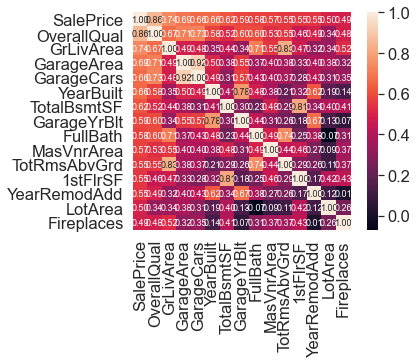

In [121]:
# Top 11 Heatmap
k = 11 #number of variables for heatmap
colls = cormat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataa[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



<p>I used linear regression to do this part. It's a technique that is used to find relationship between two variable by showing us how much dependent variable will change comapred to independent variable.
    $Y= mx + b$ is the mathematical formual for linear regression.
    In our Case of predicting the house prices we used several inedependent variables such as quality, neghbourhood etc used to predict House prices. This is called mutiple linear regression.the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.[

[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.

In [122]:
#pick out x columns and y cloumns. Three dufferent X axis are created based on the
#3 different sets of varibales That were already created in part 2 
X=dataa[cols]
X2=dataa[cols2]
X3=dataa[cols3]
Y=dataa['SalePrice']
X=X.drop('SalePrice', axis=1)
X2=X2.drop('SalePrice', axis=1)
X3=X3.drop('SalePrice', axis=1)


In [123]:
# Linear Regression for first set with 15 independent variables 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lr=linear_model.LinearRegression()
model=lr.fit(X,Y)
prediction=model.predict(X)
#how good the model is?
model.score(X,Y)

0.8801794124012222

<h4> Linear Regression for 2nd set with 10 independent variables</h4> 

``lr=linear_model.LinearRegression()
model=lr.fit(X2,Y)
prediction2=model.predict(X2)
model.score(X2,Y)``

0.851413917245903

<h4>Linear Regression for 3nd set with 5 independent variables</h4>

`` lr=linear_model.LinearRegression()
model=lr.fit(X3,Y)
prediction3=model.predict(X3)
model.score(X3,Y)``

0.7916699059969976

(array([ 0., 10., 20., 30., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

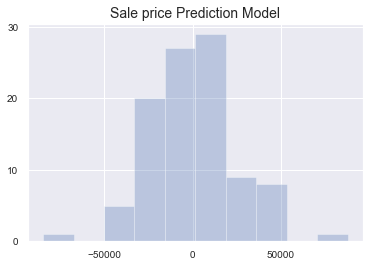

In [124]:
#Model plot based on 15 variables 
plt.hist(Y - prediction, alpha=.3)
plt.title('Sale price Prediction Model', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)



### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.


Text(0.5, 1.0, 'our prediction vs actual house prices')

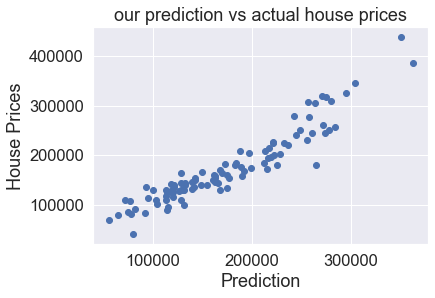

In [125]:
# scatter plot based on 15 variables
plt.scatter(prediction,Y)
plt.ylabel("House Prices")
plt.xlabel('Prediction')
plt.title('our prediction vs actual house prices')

Text(0.5, 1.0, 'our prediction vs actual house prices')

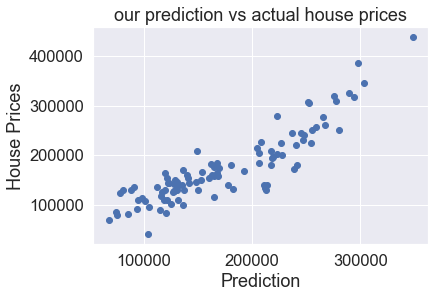

In [126]:
# scatter plot based on 5 variables
plt.scatter(prediction3,Y)
plt.ylabel("House Prices")
plt.xlabel('Prediction')
plt.title('our prediction vs actual house prices')

Text(0.5, 1.0, 'our prediction vs actual house prices')

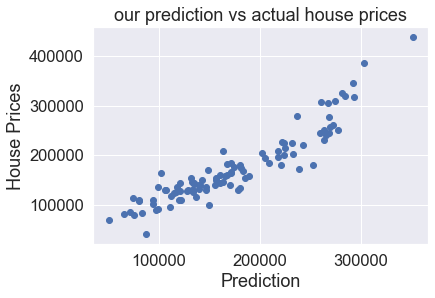

In [127]:
# scatter plot based on 10 variables
plt.scatter(prediction2,Y)
plt.ylabel("House Prices")
plt.xlabel('Prediction')
plt.title('our prediction vs actual house prices')

<p> The Model with the 15 variable performed better than the other 2 variable. Adding more variables will makes it  more likely to fit model to the training data. while data with 5 vaariable performed the least.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

In [128]:
# test data
test=pd.read_csv('/Users/wardahiqbal/Downloads/jtest.csv')
test.shape

(100, 82)

In [129]:
X_test=test[cols]
Y_test=X_test['SalePrice']
X_test= X_test.drop(["SalePrice"], axis=1)
X_test.isnull().sum() # used this to fiqure out any null values in any picked columns 
m=X_test['GarageYrBlt'].mean()
X_test=X_test.fillna(m)
X_test.isnull().sum()


OverallQual     0
GrLivArea       0
GarageArea      0
GarageCars      0
YearBuilt       0
TotalBsmtSF     0
GarageYrBlt     0
FullBath        0
MasVnrArea      0
TotRmsAbvGrd    0
1stFlrSF        0
YearRemodAdd    0
LotArea         0
Fireplaces      0
dtype: int64

In [130]:
predictions=model.predict(X_test)
predictions

array([208224.46911971, 192560.47538176, 129284.07690001, 213064.25631531,
       177348.47266564, 269447.84834287,  79690.94663892,  88448.74243646,
       122730.06206317, 217411.71703507, 164577.74990713, 191874.73226594,
       263201.94847171, 230155.14934548, 179852.18143846, 199142.46743646,
       139445.35868787, 155310.38889063, 275948.78728928, 187844.01273964,
       194411.91324673,  74458.6050969 , 137421.70786832, 173194.03538091,
       211598.77647926, 102622.74196985, 148300.57860061,  76914.07256207,
       152371.21112916, 141851.04593015, 228486.19310502, 212894.77138542,
       142770.82734724, 213014.5594941 , 174526.72712192, 206638.44856708,
       154968.42587401, 235764.27711156, 251594.17040956, 206184.53554036,
       109237.46750635, 235134.12760822, 133049.87563911, 218913.77592247,
       165063.63503814, 171697.61536057,  96699.99281345, 225734.68461324,
       179659.64688794,  98955.31453105, 130314.34094399, 280969.31567263,
       203715.97799125, 1

In [131]:
model.score(X_test,Y_test)

0.7544646052169328

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?



The model created using train data has 88 percent score. When tested with test data the Model score is 75.45 percent. The best model was created using 15 independent variables. When tested with more and less Variables the accuracy of model deccreased on test data. the accuracy went down to 55 percent on test data when tested the model created by using 20 variables. What I learned while working with diffrent variables sets is that we  need to avoid using a large number of independent variables since it will overfit our data and but would not yeild a good prediction while work with other data.



[Back to top](#Index
)
<h4>References</h4>

-Acharya, Shweta."How to improve the accuracy of a Regression Model"towardsdatascience.com. Towards data science. 2021.https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604.

-Adithiyan, Nikhil "House Price Prediction With Machine Learning in Python".medium.com.22020.https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff.